In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import anndata
import scanpy as sc
from ALLCools.mcds import MCDS
from ALLCools.clustering import tsne, significant_pc_test, filter_regions, remove_black_list_region, lsi, binarize_matrix
from ALLCools.plot import *

In [28]:
import matplotlib as mpl
mpl.style.use('default')
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Helvetica'

In [38]:
metadata = pd.read_csv('../metadata/GBM_metadata_9samples.csv', index_col = 0)
metadata

,Plate,PCRIndex,MultiplexGroup,RandomIndex,Col384,Row384,R1InputReads,R1InputReadsBP,R1WithAdapters,R1QualTrimBP,...,chr18_3c,chr11_3c,chr15_3c,chr16_3c,chr19_3c,chr20_3c,chrX_3c,chr21_3c,chr22_3c,type
cell,,,,,,,,,,,,,,,,,,,,,
GBM_BT00009_Plate1-1-J2-A13,GBM_BT00009_Plate1,J2,1.0,A13,12.0,0.0,543811.0,75960330.0,329.0,130615.0,...,-0.169119,0.514556,-0.305797,-0.664611,-0.963400,-0.715979,-0.404173,-1.606505,-2.007092,malignant
GBM_BT00009_Plate1-1-J2-A14,GBM_BT00009_Plate1,J2,1.0,A14,13.0,0.0,1443841.0,205273886.0,871.0,450225.0,...,-0.331649,0.655225,-0.537022,-1.080347,-1.108881,-0.709778,-0.114430,-1.569391,-1.863723,malignant
GBM_BT00009_Plate1-1-J2-A1,GBM_BT00009_Plate1,J2,1.0,A1,0.0,0.0,1377070.0,195737508.0,790.0,417027.0,...,-0.674835,0.349795,-0.613550,-0.738597,-1.197165,-1.017747,-0.358494,-2.071587,-2.018895,non-malignant
GBM_BT00009_Plate1-1-J2-A2,GBM_BT00009_Plate1,J2,1.0,A2,1.0,0.0,1477121.0,209863296.0,1292.0,445281.0,...,-0.349739,0.642446,-0.353793,-1.160127,-0.898876,-0.670579,-0.289377,-1.697402,-1.799478,malignant
GBM_BT00009_Plate1-1-J2-B13,GBM_BT00009_Plate1,J2,1.0,B13,12.0,1.0,1424683.0,202180075.0,785.0,394992.0,...,-0.264942,0.758346,-0.422850,-1.248449,-1.067373,-0.706157,-0.348405,-1.774896,-1.533435,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BT0010_AR_Plate8-6-G10-O24,BT0010_AR_Plate8,G10,6.0,O24,23.0,14.0,2175912.0,309429847.0,1598.0,879107.0,...,-0.581149,0.481482,-0.460198,-0.486735,-1.550918,-0.513349,-0.380735,-2.178870,-1.792252,malignant
BT0010_AR_Plate8-6-G10-P11,BT0010_AR_Plate8,G10,6.0,P11,10.0,15.0,2564295.0,364706998.0,2144.0,1155269.0,...,-0.430892,0.395026,-0.427256,-0.423991,-1.515536,-0.815973,-0.319431,-2.199281,-1.762854,malignant
BT0010_AR_Plate8-6-G10-P12,BT0010_AR_Plate8,G10,6.0,P12,11.0,15.0,2563648.0,364577406.0,1772.0,863481.0,...,-0.627004,0.697641,-0.404231,-0.509844,-1.327841,-0.808388,-0.380319,-1.580718,-1.894935,malignant


In [2]:
mcad = sc.read_h5ad('../h5ad/GBM_mCG-frac-100K.h5ad')
mcad

AnnData object with n_obs × n_vars = 8257 × 18581
    obs: 'Plate', 'PCRIndex', 'MultiplexGroup', 'RandomIndex', 'Col384', 'Row384', 'R1InputReads', 'R1InputReadsBP', 'R1WithAdapters', 'R1QualTrimBP', 'R1TrimmedReads', 'R1TrimmedReadsBP', 'R1TrimmedReadsRate', 'R1UniqueMappedReads', 'R1DeduppedReads', 'R2InputReads', 'R2InputReadsBP', 'R2WithAdapters', 'R2QualTrimBP', 'R2TrimmedReads', 'R2TrimmedReadsBP', 'R2TrimmedReadsRate', 'R2UniqueMappedReads', 'R2DeduppedReads', 'CisShortContact', 'CisLongContact', 'TransContact', 'mCHmC', 'mCHCov', 'mCHFrac', 'mCGmC', 'mCGCov', 'mCGFrac', 'mCCCmC', 'mCCCCov', 'mCCCFrac', 'GenomeCov', 'LambdaCYFrac', 'LambdaCYCov', 'FinalmCReads', 'CellInputReadPairs', 'R1MappingRate', 'R2MappingRate', 'R1DuplicationRate', 'R2DuplicationRate', 'CellBarcodeRatio', 'TotalContacts', 'CisShortRatio', 'CisLongRatio', 'TransRatio'
    var: 'chrom', 'end', 'start'
    uns: 'log', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [40]:
metadata['sample'] = ['_'.join(s.split('_')[:2]) for s in metadata['Plate']]
metadata['LambdaCYmC'] = metadata['LambdaCYCov'].multiply(metadata['LambdaCYFrac'])
metadata

,Plate,PCRIndex,MultiplexGroup,RandomIndex,Col384,Row384,R1InputReads,R1InputReadsBP,R1WithAdapters,R1QualTrimBP,...,chr15_3c,chr16_3c,chr19_3c,chr20_3c,chrX_3c,chr21_3c,chr22_3c,type,sample,LambdaCYmC
cell,,,,,,,,,,,,,,,,,,,,,
GBM_BT00009_Plate1-1-J2-A13,GBM_BT00009_Plate1,J2,1.0,A13,12.0,0.0,543811.0,75960330.0,329.0,130615.0,...,-0.305797,-0.664611,-0.963400,-0.715979,-0.404173,-1.606505,-2.007092,malignant,GBM_BT00009,NaN
GBM_BT00009_Plate1-1-J2-A14,GBM_BT00009_Plate1,J2,1.0,A14,13.0,0.0,1443841.0,205273886.0,871.0,450225.0,...,-0.537022,-1.080347,-1.108881,-0.709778,-0.114430,-1.569391,-1.863723,malignant,GBM_BT00009,NaN
GBM_BT00009_Plate1-1-J2-A1,GBM_BT00009_Plate1,J2,1.0,A1,0.0,0.0,1377070.0,195737508.0,790.0,417027.0,...,-0.613550,-0.738597,-1.197165,-1.017747,-0.358494,-2.071587,-2.018895,non-malignant,GBM_BT00009,NaN
GBM_BT00009_Plate1-1-J2-A2,GBM_BT00009_Plate1,J2,1.0,A2,1.0,0.0,1477121.0,209863296.0,1292.0,445281.0,...,-0.353793,-1.160127,-0.898876,-0.670579,-0.289377,-1.697402,-1.799478,malignant,GBM_BT00009,NaN
GBM_BT00009_Plate1-1-J2-B13,GBM_BT00009_Plate1,J2,1.0,B13,12.0,1.0,1424683.0,202180075.0,785.0,394992.0,...,-0.422850,-1.248449,-1.067373,-0.706157,-0.348405,-1.774896,-1.533435,malignant,GBM_BT00009,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BT0010_AR_Plate8-6-G10-O24,BT0010_AR_Plate8,G10,6.0,O24,23.0,14.0,2175912.0,309429847.0,1598.0,879107.0,...,-0.460198,-0.486735,-1.550918,-0.513349,-0.380735,-2.178870,-1.792252,malignant,BT0010_AR,1467.0
BT0010_AR_Plate8-6-G10-P11,BT0010_AR_Plate8,G10,6.0,P11,10.0,15.0,2564295.0,364706998.0,2144.0,1155269.0,...,-0.427256,-0.423991,-1.515536,-0.815973,-0.319431,-2.199281,-1.762854,malignant,BT0010_AR,1720.0
BT0010_AR_Plate8-6-G10-P12,BT0010_AR_Plate8,G10,6.0,P12,11.0,15.0,2563648.0,364577406.0,1772.0,863481.0,...,-0.404231,-0.509844,-1.327841,-0.808388,-0.380319,-1.580718,-1.894935,malignant,BT0010_AR,1832.0


In [41]:
# chrL coverage for each sample
L_cov = {}
for sample in set(metadata['sample']):
    L_cov[sample] =metadata[metadata['sample'] == sample]['LambdaCYCov'].sum()
L_cov


{'CCF_3571': 2259.0,
 'CW_2209': 4370.0,
 'BT0010_AR': 766315552.0,
 'GBM_BT00009': 82182.0,
 'WT_180727': 4408.0,
 'BT5004_AR': 749301874.0,
 'MT_T18': 1174.0,
 'DI_114': 1140221.0,
 'CCF_3683': 1928.0}

In [42]:
# the average chrL methylation fraction
chrL = {}
for sample in set(metadata['sample']):
    #chrL[sample] = mcad[(mcad.obs['sample'] == sample) & (mcad.obs['LambdaCYCov'] > 0)].obs['LambdaCYFrac'].mean()
    mc = metadata[metadata['sample'] == sample]['LambdaCYmC'].sum()
    cov = metadata[metadata['sample'] == sample]['LambdaCYCov'].sum()
    chrL[sample] = mc/cov
chrL

{'CCF_3571': 0.033643204957945996,
 'CW_2209': 0.049656750572082346,
 'BT0010_AR': 0.0052506229183248545,
 'GBM_BT00009': 0.004794237180891124,
 'WT_180727': 0.03516333938294011,
 'BT5004_AR': 0.004666507747183297,
 'MT_T18': 0.04088586030664391,
 'DI_114': 0.006943390798801204,
 'CCF_3683': 0.08506224066390042}

(0.0, 10000.0)

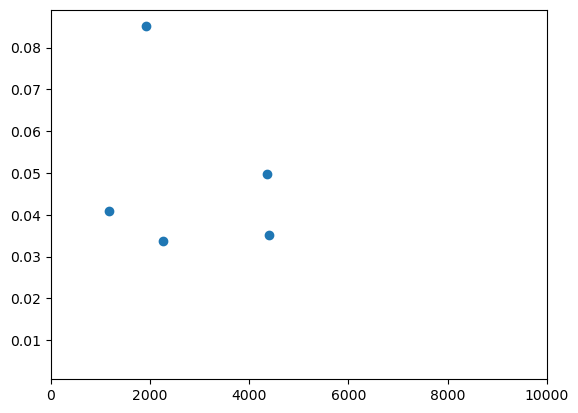

In [43]:
# x: chrL read number
# y: chrL methylation frac
#plt.plot( [np.log(v) for v in L_cov.values()], chrL.values(),'o')
plt.plot(  L_cov.values(), chrL.values(),'o')
plt.xlim(0,10000)

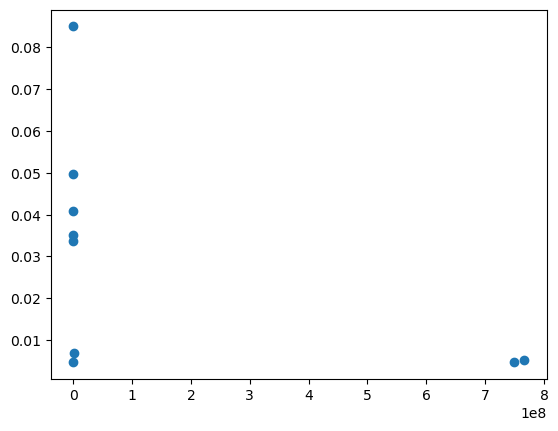

In [44]:
plt.plot(L_cov.values(), chrL.values(),'o')
#plt.xlim(0,10000)

In [46]:
# the average mCHFrac 
genome = {}
for sample in set(metadata['sample']):
    genome[sample] = metadata[metadata['sample'] == sample]['mCHFrac'].mean()
genome

{'CCF_3571': 0.013473012963732786,
 'CW_2209': 0.006728643911927108,
 'BT0010_AR': 0.00813337876359855,
 'GBM_BT00009': 0.00917132104527952,
 'WT_180727': 0.01306281731670691,
 'BT5004_AR': 0.006251235373579443,
 'MT_T18': 0.006747893573402832,
 'DI_114': 0.023052450275566662,
 'CCF_3683': 0.010337972266313453}

In [47]:
genome_cg = {}
for sample in set(metadata['sample']):
    genome_cg[sample] = metadata[metadata['sample'] == sample]['mCGFrac'].mean()
genome_cg

{'CCF_3571': 0.8013035986510414,
 'CW_2209': 0.6656209165490377,
 'BT0010_AR': 0.7957481194971341,
 'GBM_BT00009': 0.710507412379252,
 'WT_180727': 0.6928270835120334,
 'BT5004_AR': 0.7353721920869053,
 'MT_T18': 0.723911978755112,
 'DI_114': 0.6908117924054687,
 'CCF_3683': 0.7250325761156391}

In [48]:
L = pd.DataFrame.from_dict(chrL, orient = 'index',columns = ['chrL_avg_me'])
G = pd.DataFrame.from_dict(genome, orient = 'index',columns = ['CH_WG_avg_me'])
G_cg =pd.DataFrame.from_dict(genome_cg, orient = 'index',columns = ['CG_WG_avg_me'])
df = G.join(L)
df = df.join(G_cg)
df['log_CH_WG_avg_me'] = np.log2(df['CH_WG_avg_me'])
df['log_CG_WG_avg_me'] = np.log2(df['CG_WG_avg_me'])
df['log_chrL_avg_me'] = np.log2(df['chrL_avg_me'])
df

,CH_WG_avg_me,chrL_avg_me,CG_WG_avg_me,log_CH_WG_avg_me,log_CG_WG_avg_me,log_chrL_avg_me
CCF_3571,0.013473,0.033643,0.801304,-6.213784,-0.319579,-4.893541
CW_2209,0.006729,0.049657,0.665621,-7.215469,-0.587227,-4.331866
BT0010_AR,0.008133,0.005251,0.795748,-6.941929,-0.329616,-7.573296
GBM_BT00009,0.009171,0.004794,0.710507,-6.768655,-0.493078,-7.704483
WT_180727,0.013063,0.035163,0.692827,-6.258390,-0.529433,-4.829784
BT5004_AR,0.006251,0.004667,0.735372,-7.321643,-0.443453,-7.743441
MT_T18,0.006748,0.040886,0.723912,-7.211347,-0.466114,-4.612254
DI_114,0.023052,0.006943,0.690812,-5.438936,-0.533635,-7.170144
CCF_3683,0.010338,0.085062,0.725033,-6.595903,-0.463882,-3.555337


In [49]:
df['CH_r_wg_l'] = df['CH_WG_avg_me'].div(df['chrL_avg_me'])
df['CG_r_wg_l'] = df['CG_WG_avg_me'].div(df['chrL_avg_me'])
df

,CH_WG_avg_me,chrL_avg_me,CG_WG_avg_me,log_CH_WG_avg_me,log_CG_WG_avg_me,log_chrL_avg_me,CH_r_wg_l,CG_r_wg_l
CCF_3571,0.013473,0.033643,0.801304,-6.213784,-0.319579,-4.893541,0.400468,23.817695
CW_2209,0.006729,0.049657,0.665621,-7.215469,-0.587227,-4.331866,0.135503,13.404440
BT0010_AR,0.008133,0.005251,0.795748,-6.941929,-0.329616,-7.573296,1.549031,151.553088
GBM_BT00009,0.009171,0.004794,0.710507,-6.768655,-0.493078,-7.704483,1.912989,148.200305
WT_180727,0.013063,0.035163,0.692827,-6.258390,-0.529433,-4.829784,0.371490,19.703108
BT5004_AR,0.006251,0.004667,0.735372,-7.321643,-0.443453,-7.743441,1.339596,157.585122
MT_T18,0.006748,0.040886,0.723912,-7.211347,-0.466114,-4.612254,0.165042,17.705680
DI_114,0.023052,0.006943,0.690812,-5.438936,-0.533635,-7.170144,3.320057,99.491994
CCF_3683,0.010338,0.085062,0.725033,-6.595903,-0.463882,-3.555337,0.121534,8.523554


In [50]:
tmp = df[['CH_WG_avg_me','CG_WG_avg_me']]
tmp['sample'] = tmp.index
tmp = tmp.melt(id_vars =['sample'], value_vars = ['CH_WG_avg_me','CG_WG_avg_me'] )

/tmp/ipykernel_30010/3394011848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['sample'] = tmp.index


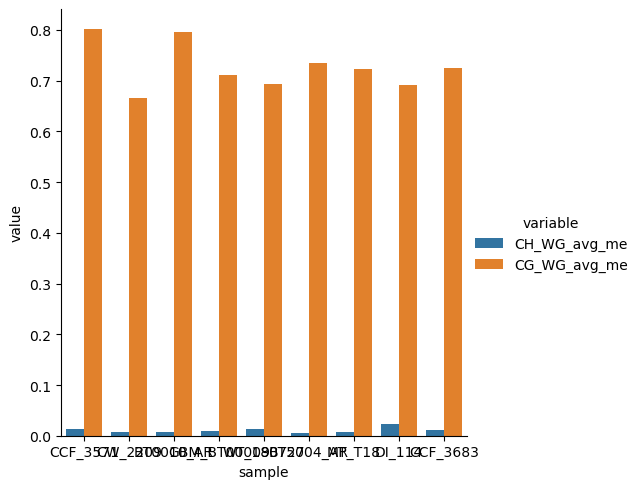

In [51]:
sns.catplot(data = tmp, kind = 'bar', x = 'sample', y='value', hue = 'variable')

<AxesSubplot:>

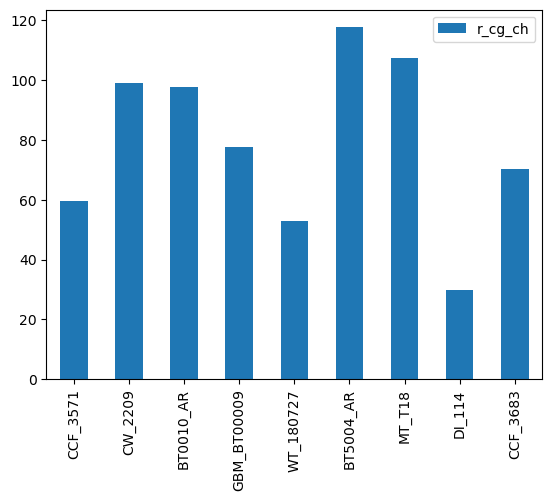

In [52]:
# whole genome mcg/mch
df['r_cg_ch'] = df['CG_WG_avg_me'].div(df['CH_WG_avg_me'])
df.plot.bar(y = 'r_cg_ch')

<AxesSubplot:>

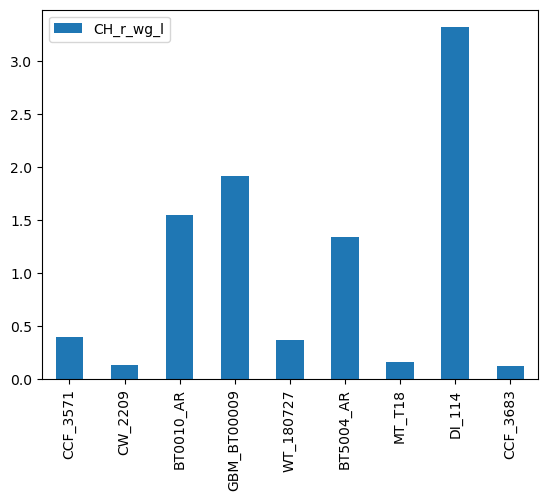

In [53]:
# global mch/chrL frac 
df.plot(kind='bar', y = 'CH_r_wg_l')

<AxesSubplot:>

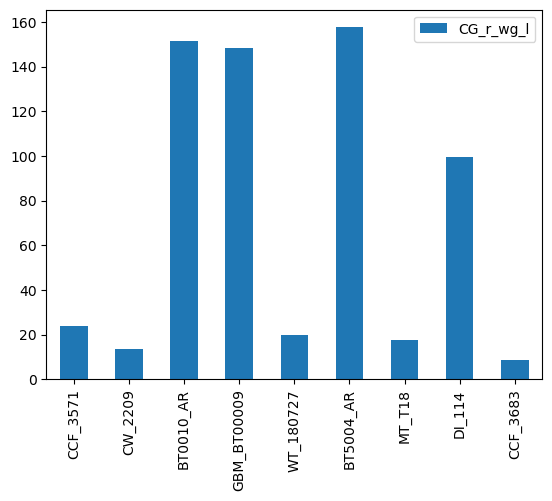

In [56]:
df.plot(kind='bar', y = 'CG_r_wg_l')

In [125]:
df.columns

Index(['CH_WG_avg_me', 'chrL_avg_me', 'CG_WG_avg_me', 'log_CH_WG_avg_me',
       'log_CG_WG_avg_me', 'log_chrL_avg_me', 'CH_r_wg_l', 'CG_r_wg_l',
       'r_cg_ch'],
      dtype='object')

<AxesSubplot:>

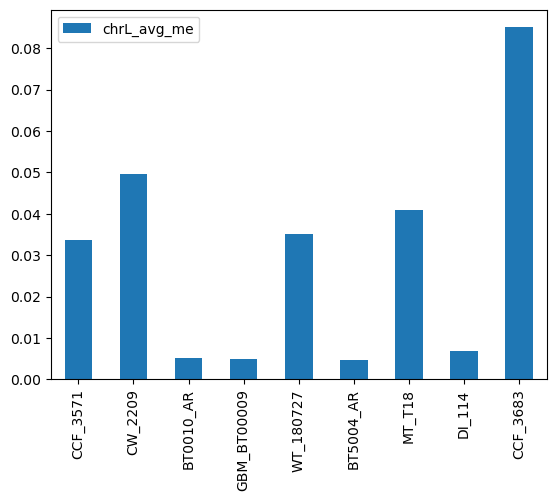

In [54]:
df.plot(kind='bar', y = 'chrL_avg_me')

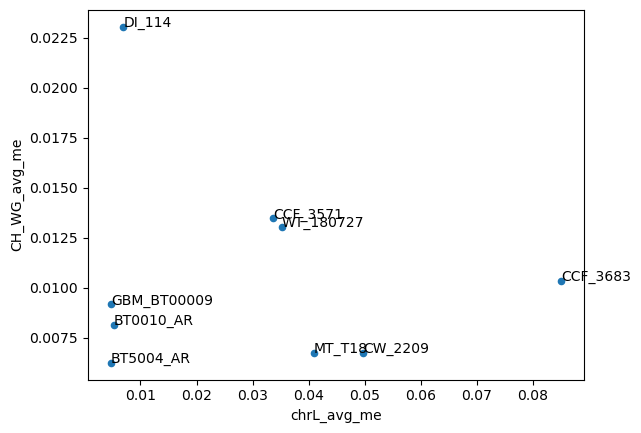

In [55]:
fig, ax = plt.subplots()
df.plot(x = 'chrL_avg_me',y='CH_WG_avg_me', kind='scatter', ax=ax)
for k, v in df[['chrL_avg_me','CH_WG_avg_me']].iterrows():
    ax.annotate(k, v)

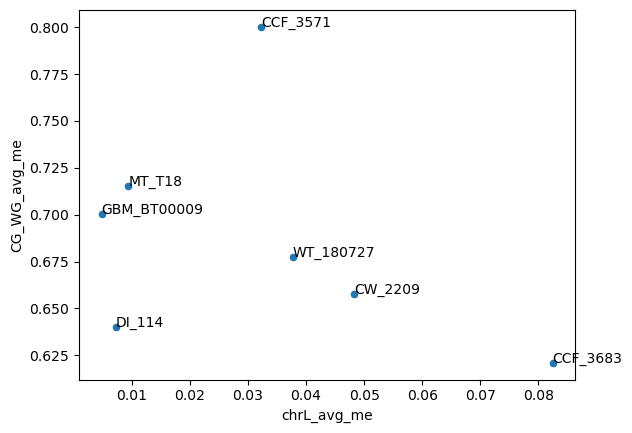

In [36]:
fig, ax = plt.subplots()
df.plot(x = 'chrL_avg_me',y='CG_WG_avg_me', kind='scatter', ax=ax)
for k, v in df[['chrL_avg_me','CG_WG_avg_me']].iterrows():
    ax.annotate(k, v)

## mCG

In [76]:
genome_cg = {}
for sample in set(mcad.obs['sample']):
    genome_cg[sample] = mcad[mcad.obs['sample'] == sample].obs['mCGFrac'].mean()
genome_cg

{'WT_180727': 0.6774977251179862,
 'GBM_BT00009': 0.7004609695317444,
 'MT_T18': 0.7151833082366907,
 'CCF_3571': 0.8002617893703464,
 'CW_2209': 0.6575383005682068,
 'DI_114': 0.6399544328187285,
 'CCF_3683': 0.6209660554194874}

In [77]:
L = pd.DataFrame.from_dict(chrL, orient = 'index',columns = ['chrL_avg_me'])
G = pd.DataFrame.from_dict(genome_cg, orient = 'index',columns = ['WG_avg_me'])
df = G.join(L)
df['log_WG_avg_me'] = np.log2(df['WG_avg_me'])
df['log_chrL_avg_me'] = np.log2(df['chrL_avg_me'])
df['r_wg_l'] = df['WG_avg_me'].div(df['chrL_avg_me'])
df

,WG_avg_me,chrL_avg_me,log_WG_avg_me,log_chrL_avg_me,r_wg_l
WT_180727,0.677498,0.041683,-0.561712,-4.584412,16.253744
GBM_BT00009,0.700461,0.007469,-0.513623,-7.064961,93.788416
MT_T18,0.715183,0.105379,-0.483615,-3.246340,6.786770
CCF_3571,0.800262,0.030965,-0.321456,-5.013238,25.844443
CW_2209,0.657538,0.096067,-0.604853,-3.379810,6.844554
DI_114,0.639954,0.069013,-0.643959,-3.856983,9.272923
CCF_3683,0.620966,0.066362,-0.687414,-3.913497,9.357239


<AxesSubplot:>

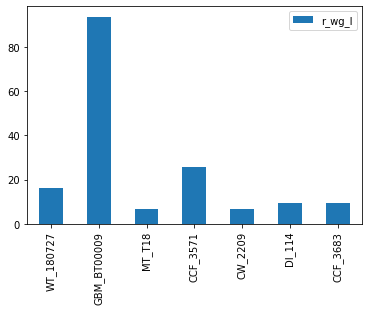

In [78]:
df.plot(kind='bar', y = 'r_wg_l')

<AxesSubplot:>

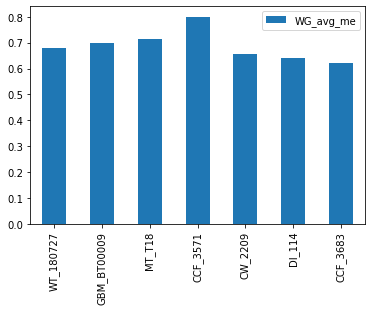

In [79]:
df.plot(kind='bar', y = 'WG_avg_me')

<AxesSubplot:>

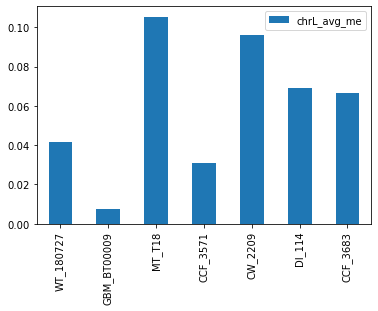

In [80]:
df.plot(kind='bar', y = 'chrL_avg_me')

# TODO: check ch cg level for malignant and normal cells

In [58]:
metadata.type.value_counts()

malignant        6629
non-malignant    4424
Name: type, dtype: int64

In [59]:
cancer = metadata[metadata.type == 'malignant']
normal = metadata[metadata.type == 'non-malignant']
normal

,Plate,PCRIndex,MultiplexGroup,RandomIndex,Col384,Row384,R1InputReads,R1InputReadsBP,R1WithAdapters,R1QualTrimBP,...,chr15_3c,chr16_3c,chr19_3c,chr20_3c,chrX_3c,chr21_3c,chr22_3c,type,sample,LambdaCYmC
cell,,,,,,,,,,,,,,,,,,,,,
GBM_BT00009_Plate1-1-J2-A1,GBM_BT00009_Plate1,J2,1.0,A1,0.0,0.0,1377070.0,195737508.0,790.0,417027.0,...,-0.613550,-0.738597,-1.197165,-1.017747,-0.358494,-2.071587,-2.018895,non-malignant,GBM_BT00009,NaN
GBM_BT00009_Plate1-1-J2-B14,GBM_BT00009_Plate1,J2,1.0,B14,13.0,1.0,1733561.0,246422294.0,1018.0,464627.0,...,-0.519921,-0.758547,-1.093854,-0.982804,-0.460285,-2.224306,-1.970894,non-malignant,GBM_BT00009,NaN
GBM_BT00009_Plate1-1-J2-D1,GBM_BT00009_Plate1,J2,1.0,D1,0.0,3.0,1730670.0,245851149.0,2068.0,494601.0,...,-0.479987,-0.691054,-1.227918,-0.953295,-0.607291,-2.024449,-2.046078,non-malignant,GBM_BT00009,NaN
GBM_BT00009_Plate1-1-J2-D2,GBM_BT00009_Plate1,J2,1.0,D2,1.0,3.0,1090616.0,154849787.0,601.0,310720.0,...,-0.305277,-0.523843,-0.964441,-0.831714,-0.304362,-3.031993,-1.717270,non-malignant,GBM_BT00009,NaN
GBM_BT00009_Plate1-1-J2-E13,GBM_BT00009_Plate1,J2,1.0,E13,12.0,4.0,1634515.0,232217595.0,1078.0,480415.0,...,-0.622689,-0.667238,-1.060311,-1.046178,-0.331549,-2.118735,-1.912019,non-malignant,GBM_BT00009,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BT0010_AR_Plate8-6-G10-G12,BT0010_AR_Plate8,G10,6.0,G12,11.0,6.0,2623299.0,373182602.0,1828.0,1084859.0,...,-0.458935,-0.534735,-1.120494,-0.745556,-0.615331,-2.280255,-1.900538,non-malignant,BT0010_AR,1597.0
BT0010_AR_Plate8-6-G10-H24,BT0010_AR_Plate8,G10,6.0,H24,23.0,7.0,2605090.0,370334447.0,3536.0,905050.0,...,-0.614449,-0.645072,-0.886764,-0.812192,-0.713920,-2.327666,-1.962989,non-malignant,BT0010_AR,1465.0
BT0010_AR_Plate8-6-G10-I24,BT0010_AR_Plate8,G10,6.0,I24,23.0,8.0,1989451.0,282831431.0,1662.0,882096.0,...,-0.517386,-0.441152,-0.928326,-0.893006,-0.772127,-2.267869,-1.956812,non-malignant,BT0010_AR,1296.0


In [60]:
total_metadata = metadata.copy()

In [63]:
#summary
# chrL coverage for each sample
metadata = normal
L_cov = {}
for sample in set(metadata['sample']):
    L_cov[sample] =metadata[metadata['sample'] == sample]['LambdaCYCov'].sum()
chrL = {}
for sample in set(metadata['sample']):
    #chrL[sample] = mcad[(mcad.obs['sample'] == sample) & (mcad.obs['LambdaCYCov'] > 0)].obs['LambdaCYFrac'].mean()
    mc = metadata[metadata['sample'] == sample]['LambdaCYmC'].sum()
    cov = metadata[metadata['sample'] == sample]['LambdaCYCov'].sum()
    chrL[sample] = mc/cov
genome = {}
for sample in set(metadata['sample']):
    genome[sample] = metadata[metadata['sample'] == sample]['mCHFrac'].mean()
genome_cg = {}
for sample in set(metadata['sample']):
    genome_cg[sample] = metadata[metadata['sample'] == sample]['mCGFrac'].mean()
L = pd.DataFrame.from_dict(chrL, orient = 'index',columns = ['chrL_avg_me'])
G = pd.DataFrame.from_dict(genome, orient = 'index',columns = ['CH_WG_avg_me'])
G_cg =pd.DataFrame.from_dict(genome_cg, orient = 'index',columns = ['CG_WG_avg_me'])
df = G.join(L)
df = df.join(G_cg)
df['log_CH_WG_avg_me'] = np.log2(df['CH_WG_avg_me'])
df['log_CG_WG_avg_me'] = np.log2(df['CG_WG_avg_me'])
df['log_chrL_avg_me'] = np.log2(df['chrL_avg_me'])
df['CH_r_wg_l'] = df['CH_WG_avg_me'].div(df['chrL_avg_me'])
df['CG_r_wg_l'] = df['CG_WG_avg_me'].div(df['chrL_avg_me'])
df

,CH_WG_avg_me,chrL_avg_me,CG_WG_avg_me,log_CH_WG_avg_me,log_CG_WG_avg_me,log_chrL_avg_me,CH_r_wg_l,CG_r_wg_l
CCF_3571,0.011419,0.008889,0.768716,-6.452472,-0.379477,-6.813781,1.284591,86.480582
CW_2209,0.008910,0.201754,0.728258,-6.810389,-0.457478,-2.309328,0.044162,3.609629
BT0010_AR,0.013867,0.005247,0.763774,-6.172230,-0.388783,-7.574209,2.642639,145.555579
GBM_BT00009,0.010876,0.004907,0.773748,-6.522683,-0.370064,-7.671010,2.216567,157.689919
WT_180727,0.010751,0.020325,0.730310,-6.539347,-0.453419,-5.620586,0.528963,35.931243
BT5004_AR,0.006287,0.004666,0.737166,-7.313426,-0.439938,-7.743576,1.347374,157.984360
MT_T18,0.006832,0.014558,0.722001,-7.193400,-0.469927,-6.102077,0.469331,49.595922
DI_114,0.022339,0.005487,0.691918,-5.484260,-0.531326,-7.509775,4.071371,126.102118
CCF_3683,0.009861,0.117172,0.718583,-6.664058,-0.476774,-3.093304,0.084158,6.132732


In [62]:
cancer_df = df.copy()

In [64]:
normal_df = df.copy()

In [65]:
cancer_df['type'] = 'cancer'
cancer_df

,CH_WG_avg_me,chrL_avg_me,CG_WG_avg_me,log_CH_WG_avg_me,log_CG_WG_avg_me,log_chrL_avg_me,CH_r_wg_l,CG_r_wg_l,type
CCF_3571,0.014040,0.044192,0.810293,-6.154339,-0.303484,-4.500074,0.317699,18.335778,cancer
CW_2209,0.006341,0.036743,0.654488,-7.301079,-0.611561,-4.766395,0.172577,17.812692,cancer
BT0010_AR,0.007012,0.005251,0.802000,-7.155887,-0.318326,-7.573116,1.335361,152.724792,cancer
GBM_BT00009,0.008312,0.004793,0.678616,-6.910663,-0.559334,-7.704908,1.734170,141.589899,cancer
WT_180727,0.013337,0.037028,0.688389,-6.228474,-0.538704,-4.755256,0.360178,18.591245,cancer
BT5004_AR,0.005910,0.004671,0.718225,-7.402629,-0.477492,-7.742183,1.265365,153.776425,cancer
MT_T18,0.006692,0.124555,0.725172,-7.223302,-0.463605,-3.005143,0.053729,5.822093,cancer
DI_114,0.023791,0.006944,0.689665,-5.393437,-0.536031,-7.169950,3.425973,99.313566,cancer
CCF_3683,0.010861,0.051173,0.732107,-6.524677,-0.449874,-4.288482,0.212245,14.306582,cancer


In [66]:
normal_df['type'] = 'normal'

In [68]:
comb_df = pd.concat([cancer_df,normal_df], axis = 0)

In [70]:
comb_df['sample'] = comb_df.index

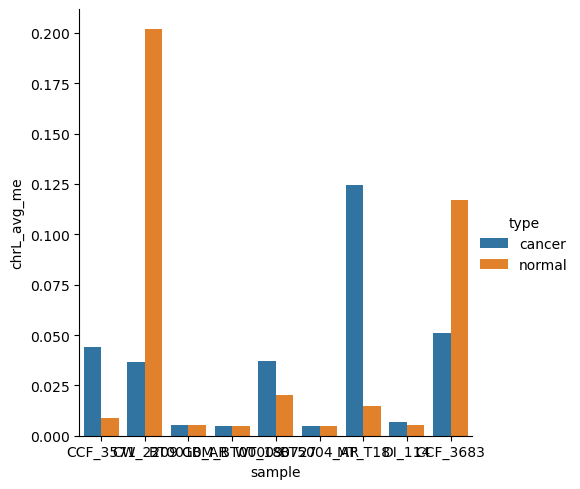

In [72]:
sns.catplot(data = comb_df, kind='bar',x = 'sample', y='chrL_avg_me', hue = 'type')

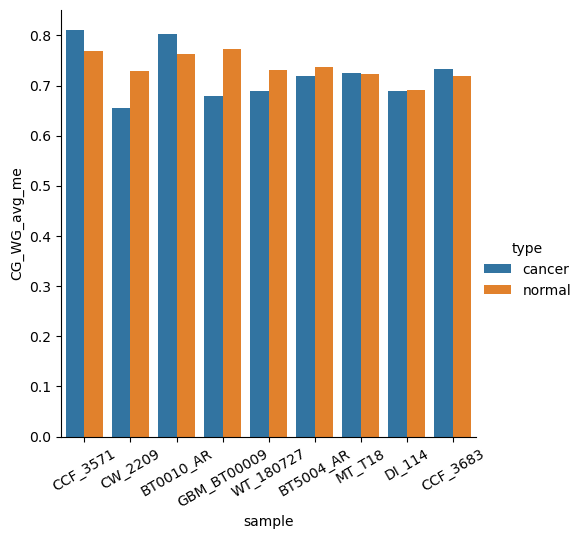

In [105]:
ax = sns.catplot(data = comb_df, kind='bar',x = 'sample', y='CG_WG_avg_me', hue = 'type')
ax.set_xticklabels(ax.axes.flat[0].get_xticklabels(),rotation = 30)


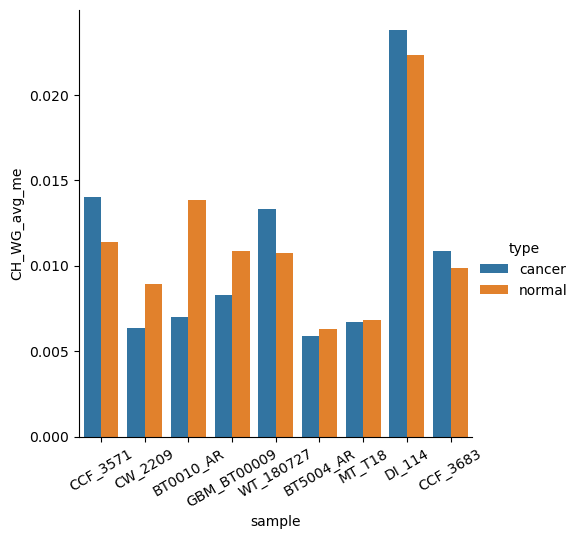

In [99]:
ax = sns.catplot(data = comb_df, kind='bar',x = 'sample', y='CH_WG_avg_me', hue = 'type')
ax.set_xticklabels(ax.axes.flat[0].get_xticklabels(),rotation = 30)


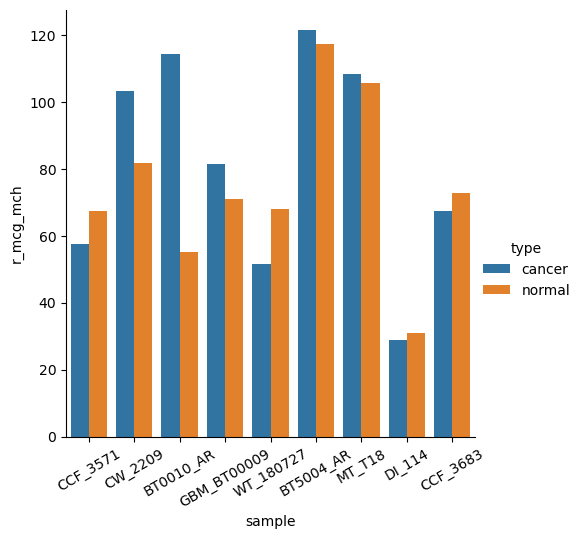

In [100]:
comb_df['r_mcg_mch'] = comb_df['CG_WG_avg_me'].div(comb_df['CH_WG_avg_me'])
ax = sns.catplot(data = comb_df, kind='bar',x = 'sample', y='r_mcg_mch', hue = 'type')
ax.set_xticklabels(ax.axes.flat[0].get_xticklabels(),rotation = 30)


In [112]:
a = pd.DataFrame(normal['sample'].value_counts())
a.columns = ['normal']
b = pd.DataFrame(cancer['sample'].value_counts())
b.columns = ['cancer']
a = a.join(b)
a['total'] = a['normal'].add(a['cancer'])
a

,normal,cancer,total
BT5004_AR,2695,282,2977
BT0010_AR,481,2460,2941
CCF_3571,240,870,1110
CCF_3683,238,217,455
GBM_BT00009,235,466,701
CW_2209,174,979,1153
DI_114,144,139,283
WT_180727,128,1081,1209
MT_T18,89,135,224


In [104]:
cancer['sample'].value_counts()

BT0010_AR      2460
WT_180727      1081
CW_2209         979
CCF_3571        870
GBM_BT00009     466
BT5004_AR       282
CCF_3683        217
DI_114          139
MT_T18          135
Name: sample, dtype: int64

In [ ]:
ax = sns.catplot(data = comb_df, kind='bar',x = 'sample', y='CH_WG_avg_me', hue = 'type')
ax.set_xticklabels(ax.axes.flat[0].get_xticklabels(),rotation = 30)


In [114]:
metadata

,Plate,PCRIndex,MultiplexGroup,RandomIndex,Col384,Row384,R1InputReads,R1InputReadsBP,R1WithAdapters,R1QualTrimBP,...,chr15_3c,chr16_3c,chr19_3c,chr20_3c,chrX_3c,chr21_3c,chr22_3c,type,sample,LambdaCYmC
cell,,,,,,,,,,,,,,,,,,,,,
GBM_BT00009_Plate1-1-J2-A1,GBM_BT00009_Plate1,J2,1.0,A1,0.0,0.0,1377070.0,195737508.0,790.0,417027.0,...,-0.613550,-0.738597,-1.197165,-1.017747,-0.358494,-2.071587,-2.018895,non-malignant,GBM_BT00009,NaN
GBM_BT00009_Plate1-1-J2-B14,GBM_BT00009_Plate1,J2,1.0,B14,13.0,1.0,1733561.0,246422294.0,1018.0,464627.0,...,-0.519921,-0.758547,-1.093854,-0.982804,-0.460285,-2.224306,-1.970894,non-malignant,GBM_BT00009,NaN
GBM_BT00009_Plate1-1-J2-D1,GBM_BT00009_Plate1,J2,1.0,D1,0.0,3.0,1730670.0,245851149.0,2068.0,494601.0,...,-0.479987,-0.691054,-1.227918,-0.953295,-0.607291,-2.024449,-2.046078,non-malignant,GBM_BT00009,NaN
GBM_BT00009_Plate1-1-J2-D2,GBM_BT00009_Plate1,J2,1.0,D2,1.0,3.0,1090616.0,154849787.0,601.0,310720.0,...,-0.305277,-0.523843,-0.964441,-0.831714,-0.304362,-3.031993,-1.717270,non-malignant,GBM_BT00009,NaN
GBM_BT00009_Plate1-1-J2-E13,GBM_BT00009_Plate1,J2,1.0,E13,12.0,4.0,1634515.0,232217595.0,1078.0,480415.0,...,-0.622689,-0.667238,-1.060311,-1.046178,-0.331549,-2.118735,-1.912019,non-malignant,GBM_BT00009,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BT0010_AR_Plate8-6-G10-G12,BT0010_AR_Plate8,G10,6.0,G12,11.0,6.0,2623299.0,373182602.0,1828.0,1084859.0,...,-0.458935,-0.534735,-1.120494,-0.745556,-0.615331,-2.280255,-1.900538,non-malignant,BT0010_AR,1597.0
BT0010_AR_Plate8-6-G10-H24,BT0010_AR_Plate8,G10,6.0,H24,23.0,7.0,2605090.0,370334447.0,3536.0,905050.0,...,-0.614449,-0.645072,-0.886764,-0.812192,-0.713920,-2.327666,-1.962989,non-malignant,BT0010_AR,1465.0
BT0010_AR_Plate8-6-G10-I24,BT0010_AR_Plate8,G10,6.0,I24,23.0,8.0,1989451.0,282831431.0,1662.0,882096.0,...,-0.517386,-0.441152,-0.928326,-0.893006,-0.772127,-2.267869,-1.956812,non-malignant,BT0010_AR,1296.0
